Part 14- 25 minus 15, 16

In [2]:
#Candlestick OHLC graphs
#pip install https://github.com/matplotlib/mpl_finance/archive/master.zip

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mticker
from matplotlib.finance import candlestick_ohlc

import numpy as np
import urllib
import datetime as dt


def bytespdate2num(fmt, encoding='utf-8'):
    strconverter = mdates.strpdate2num(fmt)
    def bytesconverter(b):
        s = b.decode(encoding)
        return strconverter(s)
    return bytesconverter
    

def graph_data(stock):

    fig = plt.figure()
    ax1 = plt.subplot2grid((1,1), (0,0))
    
    # Unfortunately, Yahoo's API is no longer available
    # feel free to adapt the code to another source, or use this drop-in replacement.
    stock_price_url = 'https://pythonprogramming.net/yahoo_finance_replacement'
    source_code = urllib.request.urlopen(stock_price_url).read().decode()
    stock_data = []
    split_source = source_code.split('\n')
    for line in split_source[1:]:
        split_line = line.split(',')
        if len(split_line) == 7:
            if 'values' not in line and 'labels' not in line:
                stock_data.append(line)

    
    date, closep, highp, lowp, openp, adj_closep, volume = np.loadtxt(stock_data,
                                                          delimiter=',',
                                                          unpack=True,
                                                          converters={0: bytespdate2num('%Y-%m-%d')})

    x = 0
    y = len(date)
    ohlc = []

    while x < y:
        append_me = date[x], openp[x], highp[x], lowp[x], closep[x], volume[x]
        ohlc.append(append_me)
        x+=1


    candlestick_ohlc(ax1, ohlc, width=0.4, colorup='#77d879', colordown='#db3f3f')

    for label in ax1.xaxis.get_ticklabels():
        label.set_rotation(45)

    ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    ax1.xaxis.set_major_locator(mticker.MaxNLocator(10))
    ax1.grid(True)
    

    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title(stock)
    plt.legend()
    plt.subplots_adjust(left=0.09, bottom=0.20, right=0.94, top=0.90, wspace=0.2, hspace=0)
    plt.show()


graph_data('EBAY')

ModuleNotFoundError: No module named 'matplotlib.finance'

In [ ]:
#Annotations and Text 
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mticker
from matplotlib.finance import candlestick_ohlc
from matplotlib import style

import numpy as np
import urllib
import datetime as dt

style.use('fivethirtyeight')
print(plt.style.available)

print(plt.__file__)


def bytespdate2num(fmt, encoding='utf-8'):
    strconverter = mdates.strpdate2num(fmt)
    def bytesconverter(b):
        s = b.decode(encoding)
        return strconverter(s)
    return bytesconverter
    

def graph_data(stock):

    fig = plt.figure()
    ax1 = plt.subplot2grid((1,1), (0,0))
    
    stock_price_url = 'http://chartapi.finance.yahoo.com/instrument/1.0/'+stock+'/chartdata;type=quote;range=1m/csv'
    source_code = urllib.request.urlopen(stock_price_url).read().decode()
    stock_data = []
    split_source = source_code.split('\n')
    for line in split_source:
        split_line = line.split(',')
        if len(split_line) == 6:
            if 'values' not in line and 'labels' not in line:
                stock_data.append(line)

    
    date, closep, highp, lowp, openp, volume = np.loadtxt(stock_data,
                                                          delimiter=',',
                                                          unpack=True,
                                                          converters={0: bytespdate2num('%Y%m%d')})

    x = 0
    y = len(date)
    ohlc = []

    while x < y:
        append_me = date[x], openp[x], highp[x], lowp[x], closep[x], volume[x]
        ohlc.append(append_me)
        x+=1


    candlestick_ohlc(ax1, ohlc, width=0.4, colorup='#77d879', colordown='#db3f3f')
  
    for label in ax1.xaxis.get_ticklabels():
        label.set_rotation(45)

    ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    ax1.xaxis.set_major_locator(mticker.MaxNLocator(10))
    ax1.grid(True)
    ax1.annotate('Bad News!',(date[9],highp[9]),
                 xytext=(0.8, 0.9), textcoords='axes fraction',
                 arrowprops = dict(facecolor='grey',color='grey'))
    
##    # Text placement example:
##    font_dict = {'family':'serif',
##                 'color':'darkred',
##                 'size':15}
##    ax1.text(date[10], closep[1],'Text Example', fontdict=font_dict)

    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title(stock)
    #plt.legend()
    plt.subplots_adjust(left=0.09, bottom=0.20, right=0.94, top=0.90, wspace=0.2, hspace=0)
    plt.show()


graph_data('ebay')

In [ ]:
# Annotating Last Price Stock Chart with Matplotlib

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mticker
from matplotlib.finance import candlestick_ohlc
from matplotlib import style

import numpy as np
import urllib
import datetime as dt

style.use('fivethirtyeight')
print(plt.style.available)

print(plt.__file__)


def bytespdate2num(fmt, encoding='utf-8'):
    strconverter = mdates.strpdate2num(fmt)
    def bytesconverter(b):
        s = b.decode(encoding)
        return strconverter(s)
    return bytesconverter
    

def graph_data(stock):

    fig = plt.figure()
    ax1 = plt.subplot2grid((1,1), (0,0))
    
    stock_price_url = 'http://chartapi.finance.yahoo.com/instrument/1.0/'+stock+'/chartdata;type=quote;range=1m/csv'
    source_code = urllib.request.urlopen(stock_price_url).read().decode()
    stock_data = []
    split_source = source_code.split('\n')
    for line in split_source:
        split_line = line.split(',')
        if len(split_line) == 6:
            if 'values' not in line and 'labels' not in line:
                stock_data.append(line)

    
    date, closep, highp, lowp, openp, volume = np.loadtxt(stock_data,
                                                          delimiter=',',
                                                          unpack=True,
                                                          converters={0: bytespdate2num('%Y%m%d')})

    x = 0
    y = len(date)
    ohlc = []

    while x < y:
        append_me = date[x], openp[x], highp[x], lowp[x], closep[x], volume[x]
        ohlc.append(append_me)
        x+=1


    candlestick_ohlc(ax1, ohlc, width=0.4, colorup='#77d879', colordown='#db3f3f')
  
    for label in ax1.xaxis.get_ticklabels():
        label.set_rotation(45)

    ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    ax1.xaxis.set_major_locator(mticker.MaxNLocator(10))
    ax1.grid(True)
    
    bbox_props = dict(boxstyle='round',fc='w', ec='k',lw=1)
    
    ax1.annotate(str(closep[-1]), (date[-1], closep[-1]),
                 xytext = (date[-1]+3, closep[-1]), bbox=bbox_props)

    
##    # Annotation example with arrow
##    ax1.annotate('Bad News!',(date[11],highp[11]),
##                 xytext=(0.8, 0.9), textcoords='axes fraction',
##                 arrowprops = dict(facecolor='grey',color='grey'))
##
##    
##    # Font dict example
##    font_dict = {'family':'serif',
##                 'color':'darkred',
##                 'size':15}
##    # Hard coded text 
##    ax1.text(date[10], closep[1],'Text Example', fontdict=font_dict)

    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title(stock)
    #plt.legend()
    plt.subplots_adjust(left=0.11, bottom=0.24, right=0.87, top=0.90, wspace=0.2, hspace=0)
    plt.show()


graph_data('EBAY')

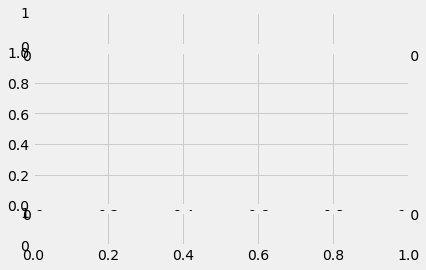

In [12]:
#Create subplots
import random
import matplotlib.pyplot as plt
from matplotlib import style

style.use('fivethirtyeight')

fig = plt.figure()

def create_plots():
    xs = []
    ys = []

    for i in range(10):
        x = i
        y = random.randrange(10)

        xs.append(x)
        ys.append(y)
    return xs, ys

ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(212)

ax1 = plt.subplot2grid((6,1), (0,0), rowspan=1, colspan=1)
ax2 = plt.subplot2grid((6,1), (1,0), rowspan=4, colspan=1)
ax3 = plt.subplot2grid((6,1), (5,0), rowspan=1, colspan=1)

In [ ]:
#Implementing Subplots to our Chart

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mticker
from matplotlib.finance import candlestick_ohlc
from matplotlib import style

import numpy as np
import urllib
import datetime as dt

style.use('fivethirtyeight')
print(plt.style.available)

print(plt.__file__)


def bytespdate2num(fmt, encoding='utf-8'):
    strconverter = mdates.strpdate2num(fmt)
    def bytesconverter(b):
        s = b.decode(encoding)
        return strconverter(s)
    return bytesconverter
    

def graph_data(stock):

    fig = plt.figure()
    ax1 = plt.subplot2grid((6,1), (0,0), rowspan=1, colspan=1)
    plt.title(stock)
    ax2 = plt.subplot2grid((6,1), (1,0), rowspan=4, colspan=1)
    plt.xlabel('Date')
    plt.ylabel('Price')
    ax3 = plt.subplot2grid((6,1), (5,0), rowspan=1, colspan=1)
    
    
    stock_price_url = 'http://chartapi.finance.yahoo.com/instrument/1.0/'+stock+'/chartdata;type=quote;range=1m/csv'
    source_code = urllib.request.urlopen(stock_price_url).read().decode()
    stock_data = []
    split_source = source_code.split('\n')
    for line in split_source:
        split_line = line.split(',')
        if len(split_line) == 6:
            if 'values' not in line and 'labels' not in line:
                stock_data.append(line)

    
    date, closep, highp, lowp, openp, volume = np.loadtxt(stock_data,
                                                          delimiter=',',
                                                          unpack=True,
                                                          converters={0: bytespdate2num('%Y%m%d')})

    x = 0
    y = len(date)
    ohlc = []

    while x < y:
        append_me = date[x], openp[x], highp[x], lowp[x], closep[x], volume[x]
        ohlc.append(append_me)
        x+=1


    candlestick_ohlc(ax2, ohlc, width=0.4, colorup='#77d879', colordown='#db3f3f')
  
    for label in ax2.xaxis.get_ticklabels():
        label.set_rotation(45)

    ax2.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    ax2.xaxis.set_major_locator(mticker.MaxNLocator(10))
    ax2.grid(True)
    
    bbox_props = dict(boxstyle='round',fc='w', ec='k',lw=1)
    
    ax2.annotate(str(closep[-1]), (date[-1], closep[-1]),
                 xytext = (date[-1]+4, closep[-1]), bbox=bbox_props)

    
##    # Annotation example with arrow
##    ax1.annotate('Bad News!',(date[11],highp[11]),
##                 xytext=(0.8, 0.9), textcoords='axes fraction',
##                 arrowprops = dict(facecolor='grey',color='grey'))
##
##    
##    # Font dict example
##    font_dict = {'family':'serif',
##                 'color':'darkred',
##                 'size':15}
##    # Hard coded text 
##    ax1.text(date[10], closep[1],'Text Example', fontdict=font_dict)

    
    #
    #plt.legend()
    plt.subplots_adjust(left=0.11, bottom=0.24, right=0.90, top=0.90, wspace=0.2, hspace=0)
    plt.show()


graph_data('EBAY')

In [ ]:
#More indicator data
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mticker
from matplotlib.finance import candlestick_ohlc
from matplotlib import style

import numpy as np
import urllib
import datetime as dt

style.use('fivethirtyeight')
print(plt.style.available)

print(plt.__file__)

MA1 = 10
MA2 = 30

def moving_average(values, window):
    weights = np.repeat(1.0, window)/window
    smas = np.convolve(values, weights, 'valid')
    return smas

def high_minus_low(highs, lows):
    return highs-lows


def bytespdate2num(fmt, encoding='utf-8'):
    strconverter = mdates.strpdate2num(fmt)
    def bytesconverter(b):
        s = b.decode(encoding)
        return strconverter(s)
    return bytesconverter
    

def graph_data(stock):

    fig = plt.figure()
    ax1 = plt.subplot2grid((6,1), (0,0), rowspan=1, colspan=1)
    plt.title(stock)
    ax2 = plt.subplot2grid((6,1), (1,0), rowspan=4, colspan=1)
    plt.xlabel('Date')
    plt.ylabel('Price')
    ax3 = plt.subplot2grid((6,1), (5,0), rowspan=1, colspan=1)
    
    
    stock_price_url = 'http://chartapi.finance.yahoo.com/instrument/1.0/'+stock+'/chartdata;type=quote;range=1y/csv'
    source_code = urllib.request.urlopen(stock_price_url).read().decode()
    stock_data = []
    split_source = source_code.split('\n')
    for line in split_source:
        split_line = line.split(',')
        if len(split_line) == 6:
            if 'values' not in line and 'labels' not in line:
                stock_data.append(line)

    
    date, closep, highp, lowp, openp, volume = np.loadtxt(stock_data,
                                                          delimiter=',',
                                                          unpack=True,
                                                          converters={0: bytespdate2num('%Y%m%d')})

    x = 0
    y = len(date)
    ohlc = []

    while x < y:
        append_me = date[x], openp[x], highp[x], lowp[x], closep[x], volume[x]
        ohlc.append(append_me)
        x+=1

    ma1 = moving_average(closep,MA1)
    ma2 = moving_average(closep,MA2)
    start = len(date[MA2-1:])

    h_l = list(map(high_minus_low, highp, lowp))

    ax1.plot_date(date,h_l,'-')


    candlestick_ohlc(ax2, ohlc, width=0.4, colorup='#77d879', colordown='#db3f3f')
  
    for label in ax2.xaxis.get_ticklabels():
        label.set_rotation(45)

    ax2.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    ax2.xaxis.set_major_locator(mticker.MaxNLocator(10))
    ax2.grid(True)
    
    bbox_props = dict(boxstyle='round',fc='w', ec='k',lw=1)
    
    ax2.annotate(str(closep[-1]), (date[-1], closep[-1]),
                 xytext = (date[-1]+4, closep[-1]), bbox=bbox_props)

    
##    # Annotation example with arrow
##    ax2.annotate('Bad News!',(date[11],highp[11]),
##                 xytext=(0.8, 0.9), textcoords='axes fraction',
##                 arrowprops = dict(facecolor='grey',color='grey'))
##
##    
##    # Font dict example
##    font_dict = {'family':'serif',
##                 'color':'darkred',
##                 'size':15}
##    # Hard coded text 
##    ax2.text(date[10], closep[1],'Text Example', fontdict=font_dict)



    ax3.plot(date[-start:], ma1[-start:])
    ax3.plot(date[-start:], ma2[-start:])


    plt.subplots_adjust(left=0.11, bottom=0.24, right=0.90, top=0.90, wspace=0.2, hspace=0)
    plt.show()


graph_data('EBAY')

In [ ]:
#Custom fills, pruning, and cleaning
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mticker
from matplotlib.finance import candlestick_ohlc
from matplotlib import style

import numpy as np
import urllib
import datetime as dt

style.use('fivethirtyeight')
print(plt.style.available)

print(plt.__file__)

MA1 = 10
MA2 = 30

def moving_average(values, window):
    weights = np.repeat(1.0, window)/window
    smas = np.convolve(values, weights, 'valid')
    return smas

def high_minus_low(highs, lows):
    return highs-lows


def bytespdate2num(fmt, encoding='utf-8'):
    strconverter = mdates.strpdate2num(fmt)
    def bytesconverter(b):
        s = b.decode(encoding)
        return strconverter(s)
    return bytesconverter
    

def graph_data(stock):

    fig = plt.figure()
    ax1 = plt.subplot2grid((6,1), (0,0), rowspan=1, colspan=1)
    plt.title(stock)
    plt.ylabel('H-L')
    ax2 = plt.subplot2grid((6,1), (1,0), rowspan=4, colspan=1)
    plt.ylabel('Price')
    ax3 = plt.subplot2grid((6,1), (5,0), rowspan=1, colspan=1)
    plt.ylabel('MAvgs')
    
    
    stock_price_url = 'http://chartapi.finance.yahoo.com/instrument/1.0/'+stock+'/chartdata;type=quote;range=1y/csv'
    source_code = urllib.request.urlopen(stock_price_url).read().decode()
    stock_data = []
    split_source = source_code.split('\n')
    for line in split_source:
        split_line = line.split(',')
        if len(split_line) == 6:
            if 'values' not in line and 'labels' not in line:
                stock_data.append(line)

    
    date, closep, highp, lowp, openp, volume = np.loadtxt(stock_data,
                                                          delimiter=',',
                                                          unpack=True,
                                                          converters={0: bytespdate2num('%Y%m%d')})

    x = 0
    y = len(date)
    ohlc = []

    while x < y:
        append_me = date[x], openp[x], highp[x], lowp[x], closep[x], volume[x]
        ohlc.append(append_me)
        x+=1

    ma1 = moving_average(closep,MA1)
    ma2 = moving_average(closep,MA2)
    start = len(date[MA2-1:])

    h_l = list(map(high_minus_low, highp, lowp))
    

    ax1.plot_date(date,h_l,'-')
    ax1.yaxis.set_major_locator(mticker.MaxNLocator(nbins=5, prune='lower'))


    candlestick_ohlc(ax2, ohlc, width=0.4, colorup='#77d879', colordown='#db3f3f')
  
    

    
    ax2.grid(True)
    
    bbox_props = dict(boxstyle='round',fc='w', ec='k',lw=1)
    
    ax2.annotate(str(closep[-1]), (date[-1], closep[-1]),
                 xytext = (date[-1]+4, closep[-1]), bbox=bbox_props)

    
##    # Annotation example with arrow
##    ax2.annotate('Bad News!',(date[11],highp[11]),
##                 xytext=(0.8, 0.9), textcoords='axes fraction',
##                 arrowprops = dict(facecolor='grey',color='grey'))
##
##    
##    # Font dict example
##    font_dict = {'family':'serif',
##                 'color':'darkred',
##                 'size':15}
##    # Hard coded text 
##    ax2.text(date[10], closep[1],'Text Example', fontdict=font_dict)



    ax3.plot(date[-start:], ma1[-start:], linewidth=1)
    ax3.plot(date[-start:], ma2[-start:], linewidth=1)
    
    ax3.fill_between(date[-start:], ma2[-start:], ma1[-start:],
                     where=(ma1[-start:] < ma2[-start:]),
                     facecolor='r', edgecolor='r', alpha=0.5)

    ax3.fill_between(date[-start:], ma2[-start:], ma1[-start:],
                     where=(ma1[-start:] > ma2[-start:]),
                     facecolor='g', edgecolor='g', alpha=0.5)
    
    ax3.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    ax3.xaxis.set_major_locator(mticker.MaxNLocator(10))

    for label in ax3.xaxis.get_ticklabels():
        label.set_rotation(45)

    plt.setp(ax1.get_xticklabels(), visible=False)
    plt.setp(ax2.get_xticklabels(), visible=False)
    plt.subplots_adjust(left=0.11, bottom=0.24, right=0.90, top=0.90, wspace=0.2, hspace=0)
    plt.show()


graph_data('EBAY')

In [ ]:
#Share X Axis, sharex
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mticker
from matplotlib.finance import candlestick_ohlc
from matplotlib import style

import numpy as np
import urllib
import datetime as dt

style.use('fivethirtyeight')
print(plt.style.available)

print(plt.__file__)

MA1 = 10
MA2 = 30

def moving_average(values, window):
    weights = np.repeat(1.0, window)/window
    smas = np.convolve(values, weights, 'valid')
    return smas

def high_minus_low(highs, lows):
    return highs-lows


def bytespdate2num(fmt, encoding='utf-8'):
    strconverter = mdates.strpdate2num(fmt)
    def bytesconverter(b):
        s = b.decode(encoding)
        return strconverter(s)
    return bytesconverter
    

def graph_data(stock):

    fig = plt.figure()
    ax1 = plt.subplot2grid((6,1), (0,0), rowspan=1, colspan=1)
    plt.title(stock)
    plt.ylabel('H-L')
    ax2 = plt.subplot2grid((6,1), (1,0), rowspan=4, colspan=1, sharex=ax1)
    plt.ylabel('Price')
    ax3 = plt.subplot2grid((6,1), (5,0), rowspan=1, colspan=1, sharex=ax1)
    plt.ylabel('MAvgs')
    
    
    stock_price_url = 'http://chartapi.finance.yahoo.com/instrument/1.0/'+stock+'/chartdata;type=quote;range=1y/csv'
    source_code = urllib.request.urlopen(stock_price_url).read().decode()
    stock_data = []
    split_source = source_code.split('\n')
    for line in split_source:
        split_line = line.split(',')
        if len(split_line) == 6:
            if 'values' not in line and 'labels' not in line:
                stock_data.append(line)

    
    date, closep, highp, lowp, openp, volume = np.loadtxt(stock_data,
                                                          delimiter=',',
                                                          unpack=True,
                                                          converters={0: bytespdate2num('%Y%m%d')})

    x = 0
    y = len(date)
    ohlc = []

    while x < y:
        append_me = date[x], openp[x], highp[x], lowp[x], closep[x], volume[x]
        ohlc.append(append_me)
        x+=1

    ma1 = moving_average(closep,MA1)
    ma2 = moving_average(closep,MA2)
    start = len(date[MA2-1:])

    h_l = list(map(high_minus_low, highp, lowp))
    

    ax1.plot_date(date[-start:],h_l[-start:],'-')
    ax1.yaxis.set_major_locator(mticker.MaxNLocator(nbins=4, prune='lower'))


    candlestick_ohlc(ax2, ohlc[-start:], width=0.4, colorup='#77d879', colordown='#db3f3f')
  
    

    ax2.yaxis.set_major_locator(mticker.MaxNLocator(nbins=7, prune='upper'))
    ax2.grid(True)
    
    bbox_props = dict(boxstyle='round',fc='w', ec='k',lw=1)
    
    ax2.annotate(str(closep[-1]), (date[-1], closep[-1]),
                 xytext = (date[-1]+4, closep[-1]), bbox=bbox_props)

    
##    # Annotation example with arrow
##    ax2.annotate('Bad News!',(date[11],highp[11]),
##                 xytext=(0.8, 0.9), textcoords='axes fraction',
##                 arrowprops = dict(facecolor='grey',color='grey'))
##
##    
##    # Font dict example
##    font_dict = {'family':'serif',
##                 'color':'darkred',
##                 'size':15}
##    # Hard coded text 
##    ax2.text(date[10], closep[1],'Text Example', fontdict=font_dict)



    ax3.plot(date[-start:], ma1[-start:], linewidth=1)
    ax3.plot(date[-start:], ma2[-start:], linewidth=1)
    
    ax3.fill_between(date[-start:], ma2[-start:], ma1[-start:],
                     where=(ma1[-start:] < ma2[-start:]),
                     facecolor='r', edgecolor='r', alpha=0.5)

    ax3.fill_between(date[-start:], ma2[-start:], ma1[-start:],
                     where=(ma1[-start:] > ma2[-start:]),
                     facecolor='g', edgecolor='g', alpha=0.5)
    
    ax3.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    ax3.xaxis.set_major_locator(mticker.MaxNLocator(10))
    ax3.yaxis.set_major_locator(mticker.MaxNLocator(nbins=4, prune='upper'))

    for label in ax3.xaxis.get_ticklabels():
        label.set_rotation(45)



    plt.setp(ax1.get_xticklabels(), visible=False)
    plt.setp(ax2.get_xticklabels(), visible=False)
    plt.subplots_adjust(left=0.11, bottom=0.24, right=0.90, top=0.90, wspace=0.2, hspace=0)
    plt.show()


graph_data('EBAY')

In [ ]:
#Multi Y Axis with twinx 
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mticker
from matplotlib.finance import candlestick_ohlc
from matplotlib import style

import numpy as np
import urllib
import datetime as dt

style.use('fivethirtyeight')
print(plt.style.available)

print(plt.__file__)

MA1 = 10
MA2 = 30

def moving_average(values, window):
    weights = np.repeat(1.0, window)/window
    smas = np.convolve(values, weights, 'valid')
    return smas

def high_minus_low(highs, lows):
    return highs-lows


def bytespdate2num(fmt, encoding='utf-8'):
    strconverter = mdates.strpdate2num(fmt)
    def bytesconverter(b):
        s = b.decode(encoding)
        return strconverter(s)
    return bytesconverter
    

def graph_data(stock):

    fig = plt.figure()
    ax1 = plt.subplot2grid((6,1), (0,0), rowspan=1, colspan=1)
    plt.title(stock)
    plt.ylabel('H-L')
    ax2 = plt.subplot2grid((6,1), (1,0), rowspan=4, colspan=1, sharex=ax1)
    plt.ylabel('Price')
    ax2v = ax2.twinx()
    
    ax3 = plt.subplot2grid((6,1), (5,0), rowspan=1, colspan=1, sharex=ax1)
    plt.ylabel('MAvgs')
    
    
    stock_price_url = 'http://chartapi.finance.yahoo.com/instrument/1.0/'+stock+'/chartdata;type=quote;range=1y/csv'
    source_code = urllib.request.urlopen(stock_price_url).read().decode()
    stock_data = []
    split_source = source_code.split('\n')
    for line in split_source:
        split_line = line.split(',')
        if len(split_line) == 6:
            if 'values' not in line and 'labels' not in line:
                stock_data.append(line)

    
    date, closep, highp, lowp, openp, volume = np.loadtxt(stock_data,
                                                          delimiter=',',
                                                          unpack=True,
                                                          converters={0: bytespdate2num('%Y%m%d')})

    x = 0
    y = len(date)
    ohlc = []

    while x < y:
        append_me = date[x], openp[x], highp[x], lowp[x], closep[x], volume[x]
        ohlc.append(append_me)
        x+=1

    ma1 = moving_average(closep,MA1)
    ma2 = moving_average(closep,MA2)
    start = len(date[MA2-1:])

    h_l = list(map(high_minus_low, highp, lowp))
    

    ax1.plot_date(date[-start:],h_l[-start:],'-')
    ax1.yaxis.set_major_locator(mticker.MaxNLocator(nbins=4, prune='lower'))


    candlestick_ohlc(ax2, ohlc[-start:], width=0.4, colorup='#77d879', colordown='#db3f3f')
  
    

    ax2.yaxis.set_major_locator(mticker.MaxNLocator(nbins=7, prune='upper'))
    ax2.grid(True)
    
    bbox_props = dict(boxstyle='round',fc='w', ec='k',lw=1)
    
    ax2.annotate(str(closep[-1]), (date[-1], closep[-1]),
                 xytext = (date[-1]+5, closep[-1]), bbox=bbox_props)

##    # Annotation example with arrow
##    ax2.annotate('Bad News!',(date[11],highp[11]),
##                 xytext=(0.8, 0.9), textcoords='axes fraction',
##                 arrowprops = dict(facecolor='grey',color='grey'))
##
##    
##    # Font dict example
##    font_dict = {'family':'serif',
##                 'color':'darkred',
##                 'size':15}
##    # Hard coded text 
##    ax2.text(date[10], closep[1],'Text Example', fontdict=font_dict)
    
    ax2v.fill_between(date[-start:],0, volume[-start:], facecolor='#0079a3', alpha=0.4)
    ax2v.axes.yaxis.set_ticklabels([])
    ax2v.grid(False)
    ax2v.set_ylim(0, 3*volume.max())



    ax3.plot(date[-start:], ma1[-start:], linewidth=1)
    ax3.plot(date[-start:], ma2[-start:], linewidth=1)
    
    ax3.fill_between(date[-start:], ma2[-start:], ma1[-start:],
                     where=(ma1[-start:] < ma2[-start:]),
                     facecolor='r', edgecolor='r', alpha=0.5)

    ax3.fill_between(date[-start:], ma2[-start:], ma1[-start:],
                     where=(ma1[-start:] > ma2[-start:]),
                     facecolor='g', edgecolor='g', alpha=0.5)
    
    ax3.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    ax3.xaxis.set_major_locator(mticker.MaxNLocator(10))
    ax3.yaxis.set_major_locator(mticker.MaxNLocator(nbins=4, prune='upper'))

    for label in ax3.xaxis.get_ticklabels():
        label.set_rotation(45)



    plt.setp(ax1.get_xticklabels(), visible=False)
    plt.setp(ax2.get_xticklabels(), visible=False)
    plt.subplots_adjust(left=0.11, bottom=0.24, right=0.90, top=0.90, wspace=0.2, hspace=0)
    plt.show()


graph_data('GOOG')

In [ ]:
#Custom Legends with Matplotlib

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mticker
from matplotlib.finance import candlestick_ohlc
from matplotlib import style

import numpy as np
import urllib
import datetime as dt

style.use('fivethirtyeight')
print(plt.style.available)

print(plt.__file__)

MA1 = 10
MA2 = 30

def moving_average(values, window):
    weights = np.repeat(1.0, window)/window
    smas = np.convolve(values, weights, 'valid')
    return smas

def high_minus_low(highs, lows):
    return highs-lows


def bytespdate2num(fmt, encoding='utf-8'):
    strconverter = mdates.strpdate2num(fmt)
    def bytesconverter(b):
        s = b.decode(encoding)
        return strconverter(s)
    return bytesconverter
    

def graph_data(stock):

    fig = plt.figure(facecolor='#f0f0f0')
    ax1 = plt.subplot2grid((6,1), (0,0), rowspan=1, colspan=1)
    plt.title(stock)
    plt.ylabel('H-L')
    ax2 = plt.subplot2grid((6,1), (1,0), rowspan=4, colspan=1, sharex=ax1)
    plt.ylabel('Price')
    ax2v = ax2.twinx()
    
    ax3 = plt.subplot2grid((6,1), (5,0), rowspan=1, colspan=1, sharex=ax1)
    plt.ylabel('MAvgs')
    
    
    stock_price_url = 'http://chartapi.finance.yahoo.com/instrument/1.0/'+stock+'/chartdata;type=quote;range=1y/csv'
    source_code = urllib.request.urlopen(stock_price_url).read().decode()
    stock_data = []
    split_source = source_code.split('\n')
    for line in split_source:
        split_line = line.split(',')
        if len(split_line) == 6:
            if 'values' not in line and 'labels' not in line:
                stock_data.append(line)

    
    date, closep, highp, lowp, openp, volume = np.loadtxt(stock_data,
                                                          delimiter=',',
                                                          unpack=True,
                                                          converters={0: bytespdate2num('%Y%m%d')})

    x = 0
    y = len(date)
    ohlc = []

    while x < y:
        append_me = date[x], openp[x], highp[x], lowp[x], closep[x], volume[x]
        ohlc.append(append_me)
        x+=1

    ma1 = moving_average(closep,MA1)
    ma2 = moving_average(closep,MA2)
    start = len(date[MA2-1:])

    h_l = list(map(high_minus_low, highp, lowp))
    

    ax1.plot_date(date[-start:],h_l[-start:],'-', label='H-L')
    ax1.yaxis.set_major_locator(mticker.MaxNLocator(nbins=4, prune='lower'))


    candlestick_ohlc(ax2, ohlc[-start:], width=0.4, colorup='#77d879', colordown='#db3f3f')
  
    

    ax2.yaxis.set_major_locator(mticker.MaxNLocator(nbins=7, prune='upper'))
    ax2.grid(True)
    
    bbox_props = dict(boxstyle='round',fc='w', ec='k',lw=1)
    
    ax2.annotate(str(closep[-1]), (date[-1], closep[-1]),
                 xytext = (date[-1]+4, closep[-1]), bbox=bbox_props)

##    # Annotation example with arrow
##    ax2.annotate('Bad News!',(date[11],highp[11]),
##                 xytext=(0.8, 0.9), textcoords='axes fraction',
##                 arrowprops = dict(facecolor='grey',color='grey'))
##
##    
##    # Font dict example
##    font_dict = {'family':'serif',
##                 'color':'darkred',
##                 'size':15}
##    # Hard coded text 
##    ax2.text(date[10], closep[1],'Text Example', fontdict=font_dict)

    ax2v.plot([],[], color='#0079a3', alpha=0.4, label='Volume')
    ax2v.fill_between(date[-start:],0, volume[-start:], facecolor='#0079a3', alpha=0.4)
    ax2v.axes.yaxis.set_ticklabels([])
    ax2v.grid(False)
    ax2v.set_ylim(0, 3*volume.max())



    ax3.plot(date[-start:], ma1[-start:], linewidth=1, label=(str(MA1)+'MA'))
    ax3.plot(date[-start:], ma2[-start:], linewidth=1, label=(str(MA2)+'MA'))
    
    ax3.fill_between(date[-start:], ma2[-start:], ma1[-start:],
                     where=(ma1[-start:] < ma2[-start:]),
                     facecolor='r', edgecolor='r', alpha=0.5)

    ax3.fill_between(date[-start:], ma2[-start:], ma1[-start:],
                     where=(ma1[-start:] > ma2[-start:]),
                     facecolor='g', edgecolor='g', alpha=0.5)
    
    ax3.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    ax3.xaxis.set_major_locator(mticker.MaxNLocator(10))
    ax3.yaxis.set_major_locator(mticker.MaxNLocator(nbins=4, prune='upper'))

    for label in ax3.xaxis.get_ticklabels():
        label.set_rotation(45)



    plt.setp(ax1.get_xticklabels(), visible=False)
    plt.setp(ax2.get_xticklabels(), visible=False)
    plt.subplots_adjust(left=0.11, bottom=0.24, right=0.90, top=0.90, wspace=0.2, hspace=0)

    ax1.legend()
    leg = ax1.legend(loc=9, ncol=2,prop={'size':11})
    leg.get_frame().set_alpha(0.4)
    
    ax2v.legend()
    leg = ax2v.legend(loc=9, ncol=2,prop={'size':11})
    leg.get_frame().set_alpha(0.4)
    
    ax3.legend()
    leg = ax3.legend(loc=9, ncol=2,prop={'size':11})
    leg.get_frame().set_alpha(0.4)
    
    plt.show()
    fig.savefig('google.png', facecolor=fig.get_facecolor())


graph_data('GOOG')